Reference: https://www.tensorflow.org/tutorials/load_data/images#create_a_dataset

In [2]:
import tensorflow as tf
import numpy as np

2023-11-07 11:13:33.982330: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 11:13:34.926899: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 11:13:34.931699: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 11:13:37.906872: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
batchSize = 500 # 64
imgHeight = 128
imgWidth = 128S

dataPath = "datasets/food-101/food-101/images/"

trainDataset = tf.keras.utils.image_dataset_from_directory(
  dataPath,
  validation_split=0.2,
  subset="training",
  color_mode = "grayscale", 
  shuffle = True,
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

valDataset = tf.keras.utils.image_dataset_from_directory(
  dataPath,
  validation_split=0.2,
  subset="validation",
  color_mode = "grayscale",
  shuffle = True,
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)




Found 101000 files belonging to 101 classes.
Using 80800 files for training.


2023-11-07 11:25:37.382962: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-07 11:25:37.384010: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Found 101000 files belonging to 101 classes.
Using 20200 files for validation.


In [15]:
valBatch = tf.data.experimental.cardinality(valDataset)
testDataset = valDataset.take((2*valBatch) // 3)
valDataset = valDataset.skip((2*valBatch) // 3)

In [6]:
classNames = trainDataset.class_names
print(classNames)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

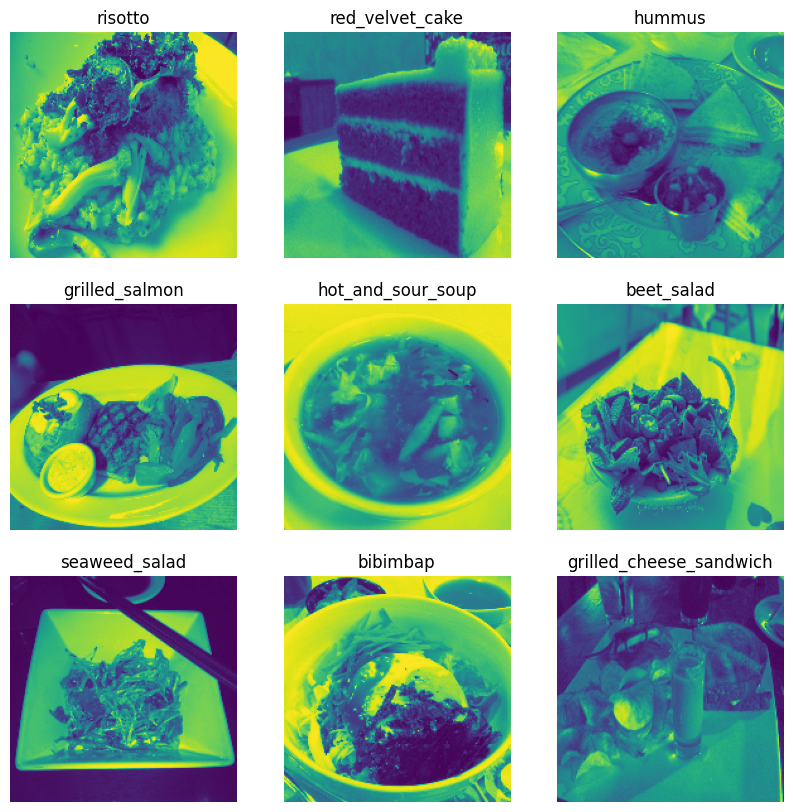

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in trainDataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classNames[labels[i]])
    plt.axis("off")

In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

trainDataset = trainDataset.cache().prefetch(buffer_size=AUTOTUNE)
valDataset = valDataset.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
numClasses = 101

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(numClasses)
])

In [12]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
model.fit(
  trainDataset,
  validation_data=valDataset,
  steps_per_epoch=100,
  validation_steps=100,
  epochs=1,
  # verbose = 2
)

100/100 [==============================] - 118s 1s/step - loss: 4.6036 - accuracy: 0.0155 - val_loss: 4.5983 - val_accuracy: 0.0205


2023-11-07 11:33:55.816548: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2023-11-07 11:33:55.853851: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [41]:
prediction = model.predict(testDataset.take(1))
print(prediction)
print(prediction.shape)
predictedClassIndices = np.argmax(prediction, axis = 1)
print(predictedClassIndices)
predictedClassLabel = np.array(classNames)[predictedClassIndices]

print(predictedClassLabel)

plt.figure(figsize=(10, 10))
for images, labels in testDataset.take(1):

    print(np.array(classNames)[np.array(labels)])

    # for i in range(9):
    #     ax = plt.subplot(3, 3, i + 1)
    #     plt.imshow(images[i].numpy().astype("uint8"))
    #     plt.title(classNames[labels[i]])
    #     plt.axis("off")





1/1 [==============================] - 2s 2s/step
[[-0.06501309  0.5404981  -0.5946255  ... -0.00487216 -0.35915902
  -0.07473125]
 [ 0.00806285  0.02345554 -0.11598161 ... -0.068698   -0.21661507
  -0.07308149]
 [ 0.0310161   0.0054715  -0.02134693 ...  0.00282514 -0.07379305
  -0.06847988]
 ...
 [ 0.01558382 -0.03201211 -0.07675704 ...  0.00805939 -0.06119649
  -0.08798153]
 [ 0.00293389  0.00714282 -0.00607947 ... -0.0264389  -0.06455468
  -0.04334396]
 [-0.02732871  0.20908926 -0.2565397  ... -0.03103456 -0.18388768
  -0.08515048]]
(64, 101)
[65  7 84 84  7 84 84  7 84 84  7  7  3 29  7  7  7 84 21 84  7  7  7 21
 84 29 84 84  7 84 84 84 84  7 84  7 21 84 84 84 19 84  7 21  7  7 29 84
  7  7 84 65 29  7 84  7  7  7  7  7  7 30  7  7]
['mussels' 'bibimbap' 'risotto' 'risotto' 'bibimbap' 'risotto' 'risotto'
 'bibimbap' 'risotto' 'risotto' 'bibimbap' 'bibimbap' 'beef_carpaccio'
 'cup_cakes' 'bibimbap' 'bibimbap' 'bibimbap' 'risotto' 'chocolate_cake'
 'risotto' 'bibimbap' 'bibimbap' 'b

2023-11-07 11:51:58.024512: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


['chocolate_cake' 'ceviche' 'greek_salad' 'seaweed_salad' 'baby_back_ribs'
 'miso_soup' 'french_toast' 'lobster_roll_sandwich' 'miso_soup' 'ramen'
 'hamburger' 'prime_rib' 'paella' 'garlic_bread' 'beef_tartare'
 'tuna_tartare' 'pizza' 'caesar_salad' 'creme_brulee' 'bread_pudding'
 'waffles' 'waffles' 'chocolate_cake' 'ramen' 'tuna_tartare'
 'french_fries' 'huevos_rancheros' 'baby_back_ribs' 'lasagna'
 'caesar_salad' 'nachos' 'tiramisu' 'mussels' 'nachos' 'tiramisu'
 'mussels' 'pulled_pork_sandwich' 'beet_salad' 'huevos_rancheros'
 'oysters' 'churros' 'fish_and_chips' 'churros' 'caesar_salad' 'tiramisu'
 'frozen_yogurt' 'hummus' 'steak' 'huevos_rancheros' 'peking_duck' 'steak'
 'cheesecake' 'pho' 'chocolate_mousse' 'pancakes' 'lasagna'
 'chicken_wings' 'paella' 'chicken_curry' 'french_toast'
 'shrimp_and_grits' 'gyoza' 'guacamole' 'creme_brulee']


2023-11-07 11:51:59.744516: W tensorflow/core/kernels/data/cache_dataset_ops.cc:854] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


<Figure size 1000x1000 with 0 Axes>